### Algorytm najszybszego spadku dla regresji wielomianowej. 
Zakładamy, że dysponujemy zbiorem składającym się z dwóch cech (x i y). Modelujemy zależność y od x za pomocą funkcji wielomianowej. Celem projektu jest implementacja metody najszybszego spadku dla tego problemu. Zakładamy kwadratową funkcję straty. Implementacja powinna umożliwiać podanie stopnia wielomianu, który ma być użyty do modelowania. Implementacja powinna zwracać wektor oszacowanych parametrów oraz pokazywać wizualnie zmiany wartości funkcji straty wraz z postępem uczenia.

Inches for Height and Pound for Weight

## Import i preprocessing danych

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
degree = 2
X_plot = np.linspace(0, 1, 1000)
initial_theta = np.matrix([0] * (degree + 1)).reshape(degree + 1, 1)

In [3]:
data = pd.read_csv('weight-height.csv')[["Height", "Weight"]]
data = data.dropna()
data_matrix = np.matrix(data)

m, n_plus_1 = data_matrix.shape
n = n_plus_1 - 1
X = (np.ones((m, 1)))

for i in range(1, degree + 1):
    Xn = np.power(data_matrix[:, 0:n], i)
    Xn /= np.amax(Xn, axis=0)
    X = np.concatenate((X, Xn), axis=1)

X = np.matrix(X).reshape(m, degree * n + 1)
Y = np.matrix(data_matrix[:, -1])

## Metody do regresji wielomianowej

In [4]:
def polynomial_regression(theta, x):
    return sum(theta * np.power(x, i) for i, theta in enumerate(theta.tolist()))

def mean_squared_error(theta, X, Y):
    J = 1.0 / (2.0 * m) * ((X * theta - Y).T * (X * theta - Y))
    return J.item()

def classic_gradient(theta, X, Y):
    return 1.0 / len(Y) * (X.T * (X * theta - Y)) 

# Batch gradient descent (BGD)
def BGD(X, Y, theta, gradient = classic_gradient, cost_function = mean_squared_error, alpha=0.1, eps=10**-5, max_steps = 10000000000):
    cost = cost_function(theta, X, Y)
    logs = [[cost, theta]]
    
    for i in range(max_steps):
        theta = theta - alpha * gradient(theta, X, Y)
        next_cost = cost_function(theta, X, Y)
        logs.append([next_cost, theta])
        if abs(cost - next_cost) <= eps:
            break
        cost = next_cost
    return theta, logs

# Mini-batch gradient descent (MBGD)
def MBGD(X, Y, theta, gradient = classic_gradient, cost_function = mean_squared_error, alpha=0.1, epochs=5, batch_size=16):
    cost = cost_function(theta, X, Y)
    logs = [[cost, theta]]
    start, end = 0, batch_size
    
    steps = m / batch_size
    for i in range(epochs):
        zipped_XY = list(zip(X, Y))
        random.shuffle(zipped_XY)
        X_shuffled, Y_shuffled = zip(*zipped_XY)
        X_shuffled = np.concatenate(X_shuffled, axis=0) 
        Y_shuffled = np.concatenate(Y_shuffled, axis=0) 
        for j in range(int(steps)):
            batch =  X_shuffled[start:end,:], Y_shuffled[start:end,:]
            theta = theta - alpha * gradient(theta, batch[0], batch[1])
            cost = cost_function(theta, X, Y)
            logs.append([cost, theta])

            if start + batch_size < batch_size:
                start += batch_size
            else:
                start = 0
            end = min(start + batch_size, m)
    return theta, logs

# Stochastic gradient descent (SGD)
def SGD(X, Y, theta, gradient = classic_gradient, cost_function = mean_squared_error, alpha=0.1, epochs=5, batch_size=16):
    return MBGD(X, Y, theta, gradient, cost_function, alpha, epochs, 1)

#print(mean_squared_error([1,2,1,1],[1,2,43,1]))
#mean_squared_error(polynomial_regression(initial_theta, X), Y)
#final_theta, logs_1 = BGD(X, Y, initial_theta)
#final_theta, logs_2 = MBGD(X, Y, initial_theta, epochs = 30, batch_size = 16)
final_theta, logs_2 = SGD(X, Y, initial_theta, epochs = 30)

Metoda gradientu prostego
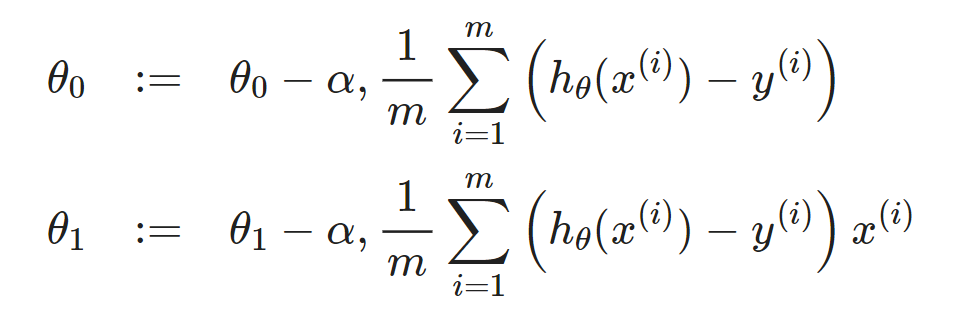

## Metody do wykresów

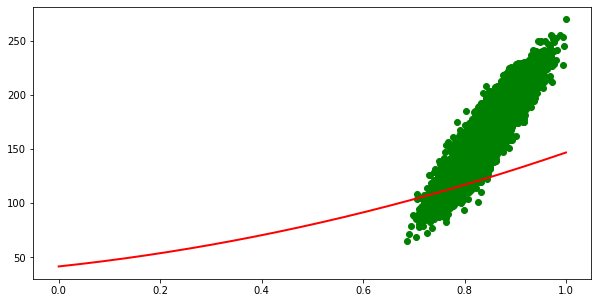

In [5]:
def plot_polynomial_regression(theta):
    fig = plt.figure(figsize=(10,5))
    Y_plot = polynomial_regression(theta, X_plot).tolist()
    chart = fig.add_subplot()
    chart.plot(X[:,1], Y ,"go")
    chart.plot(X_plot, Y_plot, color="red", lw=2, label=f"degree {len(theta)}")
    plt.show()
    
#plot_polynomial_regression(initial_theta)
plot_polynomial_regression(final_theta)

## Wyniki za pomocą gotowej biblioteki

In [6]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression

In [7]:
model = make_pipeline(PolynomialFeatures(degree=degree, include_bias=True), 
                       LinearRegression())
model.fit(data[["Height"]],Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

2

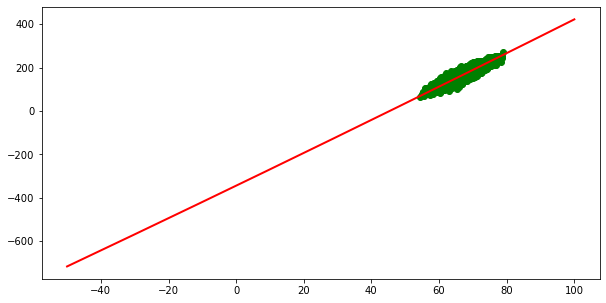

In [8]:
X_plot_2 = np.linspace(-50, 100, 1000)
Y_plot_2 = model.predict([[x] for x in X_plot_2])

fig = plt.figure(figsize=(10,5))
chart = fig.add_subplot()
chart.plot(data["Height"], Y ,"go")
chart.plot(X_plot_2, Y_plot_2, color="red", lw=2, label=f"degree {degree}")
degree